# Project: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction
Tmdb is a database which contains various details about all kinds of movies and TVs, such as genres, rating, cast, crew and etc. The dataset used in this project is taken from Kaggle, and I'll analyze it to gain some insight about the film industry with the following questions -  
<ul>
<li> What genres are more popular than others? Do they gain more popularity? Do they have more votes? Do they get better ratings? Do they generate more revenue? </li>
<li> What factors drive a movie's success (in revenune): some speicifc genres? greater budget?  released in specific months? 
</li>
</ul>


In [110]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
# Check packages' versions (to refer to the right version of documentation)
print("pandas version: " + pd.__version__)
print("numpy version: " + np.__version__)

pandas version: 0.20.3
numpy version: 1.12.1


<a id='wrangling'></a>
## Data Wrangling

### Gather

In [112]:
# Load data
df =  pd.read_csv("tmdb-movies.csv")

### Assess

In [113]:
# Get a glipse of dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


1. Some variables are irrelevant to questions to be addressed: imdb_id, cast, production_companies, homepage, tagline, keywords, director 
2. Varibale 'release_year' is redudant - it can be derived from variable 'release_date'
3. Order of variables is not optimized

In [114]:
# check if any variable/column has missing values, if any variable/column has wrong data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

1. Variables which have missing values: imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies
2. Variable 'release_date' has data type of string instead of 'datetime'

In [115]:
# Descriptive statistics of the dataset - check if any variable/column has erroneous value
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


1. Variables 'budget'/'revenue'/'runtime'/'budget_adj'/'revenue_adj' have min value of 0

In [116]:
# Observations with 'zero' budget
df[~(df.budget > 0)].shape[0]

5696

In [117]:
# Observations with 'zero' revenue
df[~(df.revenue > 0)].shape[0]

6016

In [118]:
# Observation with 'zero' runtime
df[~(df.runtime > 0)].shape[0]

31

In [119]:
# Any duplicate observations ?
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [120]:
df[df.id == 42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [121]:
# Observations which have null values in genres
df[df.genres.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [122]:
# How many genres
df.genres.value_counts()

Drama                                               712
Comedy                                              712
Documentary                                         312
Drama|Romance                                       289
Comedy|Drama                                        280
Comedy|Romance                                      268
Horror|Thriller                                     259
Horror                                              253
Comedy|Drama|Romance                                222
Drama|Thriller                                      138
Comedy|Family                                       102
Action|Thriller                                     101
Thriller                                             93
Drama|Comedy                                         92
Animation|Family                                     90
Crime|Drama|Thriller                                 81
Crime|Drama                                          74
Comedy|Horror                                   

#### Quality Issues 

1. Mulitple variables have missing values: "imdb_id", "cast", "homepage", "director", "tagline", "keywords", "overview", "genres", "production_companies"
2. Total of 5696 observations have ZERO budget
3. Total of 6016 observations have ZERO budget
4. Total of 31 observations have ZERO runtime
5. Duplicate observations (id = 42194)
6. 'release_date' is string instead of datetime

#### Tidiness Issues

1. Lots of columns are irrevelant to questions to be addressed: imdb_id, cast, home_page, director, keywords, tagline, overview, production_companies
2. Order of columns is not optimized  
3. The format of values of genres is not good for analysis 
4. Column release_year is redudant - column release_date contains info of year

### Data Cleaning

In [123]:
# Make a copy of original DataFrame
df_copy = df.copy()

#### Define

Drop duplicated observations

#### Code

In [124]:
df_copy.drop(labels = df_copy[df_copy.duplicated()].index, axis = 0, inplace = True)

#### Test

In [125]:
df_copy[df_copy.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### Define

1. Drop columns which are irrevelant to questions to be addressed: imdb_id, cast, home_page, director, keywords, tagline, overview, production_companies
2. Drop column release_year

#### Code

In [126]:
df_copy.drop(labels = ['imdb_id', 'cast', 'homepage', 'director', 'keywords', 'tagline', 'overview', 'production_companies', 'release_year'], axis = 1 ,inplace = True)


#### Test

In [127]:
df_copy.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1.747999e+08,1.385749e+09


#### Define

Adjust order of columns

#### Code

In [128]:
new_columns = ['id', 'original_title', 'popularity', 'budget', 'revenue', 'runtime', 'genres', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj']
df_copy = df_copy[new_columns]


#### Test

In [129]:
df_copy.head()

,id,original_title,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,Jurassic World,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,76341,Mad Max: Fury Road,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,262500,Insurgent,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,140607,Star Wars: The Force Awakens,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,168259,Furious 7,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,2947,7.3,1.747999e+08,1.385749e+09


#### Define

Drop observations which have missing values on 'genres'

#### Code

In [130]:
df_copy.drop(labels = df_copy[df_copy.genres.isnull()].index, axis = 0, inplace = True)

#### Test

In [131]:
df_copy[df_copy.genres.isnull()]

,id,original_title,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj


#### Define

1. Drop observations which have ZERO budget
2. Drop observations which have ZERO revenue
3. Drop observations which have ZERO runtime

#### Code

In [132]:
df_copy.drop(labels = df_copy[~(df_copy.budget > 0)].index, axis = 0, inplace = True)

In [133]:
df_copy.drop(labels = df_copy[~(df_copy.revenue > 0)].index, axis = 0, inplace = True)

In [134]:
df_copy.drop(labels = df_copy[~(df_copy.runtime > 0)].index, axis = 0, inplace = True)

#### Test

In [135]:
df_copy[['budget', 'revenue', 'runtime']].describe()

,budget,revenue,runtime
count,3.854000e+03,3.854000e+03,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291
std,4.220822e+07,1.765393e+08,19.922820
min,1.000000e+00,2.000000e+00,15.000000
25%,1.000000e+07,1.360003e+07,95.000000
50%,2.400000e+07,4.480000e+07,106.000000
75%,5.000000e+07,1.242125e+08,119.000000
max,4.250000e+08,2.781506e+09,338.000000


In [136]:
df_copy.budget.sort_values()

3581             1
2618             1
8944             2
10050            3
2398             3
8235             6
8125             8
10297            8
5162            10
5852            10
10777           11
5785            15
3853            20
10236           21
4675            25
2519            25
9992            30
3968            68
1733            75
3608            93
10495          113
6179           114
7813          6000
7044          7000
3755          8000
1354         10000
7277         12000
7447         15000
3785         17000
2449         25000
           ...    
1921     200000000
1930     200000000
1938     200000000
6215     207000000
4405     209000000
648      210000000
6883     210000000
4370     215000000
4361     220000000
4381     225000000
5432     225000000
2902     225000000
1386     237000000
10       245000000
4363     250000000
4367     250000000
5431     250000000
1389     250000000
634      250000000
643      250000000
1923     250000000
5508     255

In [137]:
df_copy[df_copy.budget < 1000000]

,id,original_title,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
113,308639,Dope,1.408050,700000,17986781,103,Crime|Drama|Comedy,6/19/15,448,7.3,6.439997e+05,1.654783e+07
242,299245,The Gallows,0.532205,100000,42664410,87,Horror|Thriller,7/10/15,247,5.0,9.199996e+04,3.925124e+07
304,308638,The D Train,0.402236,447524,771317,101,Drama|Comedy,5/8/15,47,4.2,4.117219e+05,7.096113e+05
409,309304,Grandma,0.259794,600000,7087452,78,Drama|Comedy,6/4/15,81,5.6,5.519998e+05,6.520453e+06
837,193612,The Quiet Ones,0.667732,200000,17834867,98,Horror,4/1/14,147,5.1,1.842182e+05,1.642754e+07
944,210947,Afflicted,0.401153,318000,121179,85,Horror|Thriller,4/4/14,142,6.1,2.929070e+05,1.116169e+05
1004,270654,Parts Per Billion,0.318941,500000,15000000,139,Science Fiction,3/25/14,14,4.8,4.605455e+05,1.381637e+07
1354,985,Eraserhead,0.331417,10000,7000000,89,Science Fiction|Fantasy|Horror|Drama,3/19/77,194,7.1,3.597781e+04,2.518447e+07
1365,72277,The Last Wave,0.191541,810000,1258000,106,Drama|Thriller|Mystery,1/1/77,12,5.8,2.914203e+06,4.526009e+06
1368,30315,Kingdom of the Spiders,0.164123,500000,17000000,97,Horror|Science Fiction,8/24/77,16,5.7,1.798891e+06,6.116228e+07


#### Note

It's implausible to make movies with budget less than 1 million (if not impossible) - there are some notable low-budget films, 
such as 1999's The Blair Witch Project with $60,000, 1972's Deep Throat with $22,500 ... there are also some micro-budget films, such as 1992's film El Mariachi with $7,000, The Apu Triolgy with $3,000) ... but these are rare cases ...

reference: https://en.wikipedia.org/wiki/Low-budget_film#Notable_low-budget_films

#### Define


Drop observations which have less than 1 million budget

#### Code 

In [138]:
df_copy.drop(labels = df_copy[df_copy.budget < 1000000].index, axis = 0, inplace = True)

#### Test

In [139]:
df_copy.budget.describe()

count    3.715000e+03
mean     3.858236e+07
std      4.237324e+07
min      1.000000e+06
25%      1.100000e+07
50%      2.500000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

#### Define

Create a new column for each genre: 1 if a movie is of a specific genre; 0 otherwise

#### Code


In [140]:
# Get the list of genres
list_genres = set()
for s in df_copy.genres:
    list_genres = list_genres.union(list_genres, s.split('|'))
list_genres = list(list_genres)
list_genres.sort()

# Add a column for each genre: 1 if a movie is of a specific genre; 0 otherwise
for genre in list_genres:
    df_copy[genre] = df_copy['genres'].str.contains(genre).apply(lambda x: 1 if x else 0)    

# Drop column genres
df_copy.drop(labels = ['genres'], axis = 1, inplace = True)

#### Test

In [141]:
df_copy.head()

,id,original_title,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,budget_adj,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,135397,Jurassic World,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,1.379999e+08,...,0,0,0,0,0,1,0,1,0,0
1,76341,Mad Max: Fury Road,28.419936,150000000,378436354,120,5/13/15,6185,7.1,1.379999e+08,...,0,0,0,0,0,1,0,1,0,0
2,262500,Insurgent,13.112507,110000000,295238201,119,3/18/15,2480,6.3,1.012000e+08,...,0,0,0,0,0,1,0,1,0,0
3,140607,Star Wars: The Force Awakens,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,1.839999e+08,...,0,0,0,0,0,1,0,0,0,0
4,168259,Furious 7,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,1.747999e+08,...,0,0,0,0,0,0,0,1,0,0


#### Define


Change date type of release_date to datetime (from string)

#### Code

In [142]:
df_copy.release_date = pd.to_datetime(df_copy.release_date)

#### Test

In [143]:
df_copy.release_date.head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<a id='eda'></a>
## Exploratory Data Analysis

### Explore Genres

#### Which genres are the most popular ?

Drama              0.17
Comedy             0.13
Thriller           0.12
Action             0.11
Adventure          0.07
Romance            0.06
Crime              0.06
Science Fiction    0.05
Horror             0.04
Fantasy            0.04
Family             0.04
Mystery            0.03
Animation          0.02
Western            0.01
War                0.01
History            0.01
Music              0.01
Documentary        0.00
TV Movie           0.00
Foreign            0.00
dtype: float64


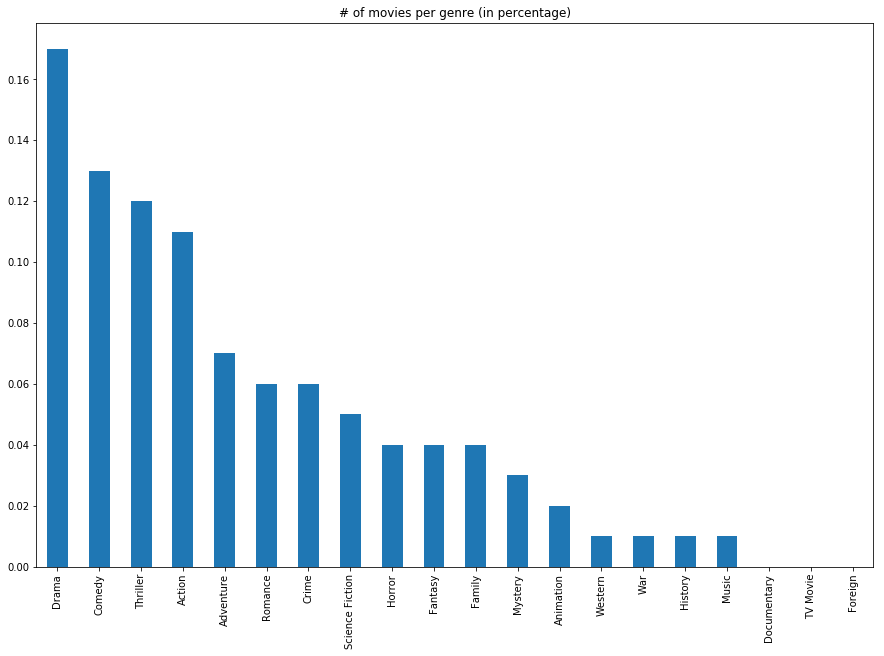

In [144]:
# Calculate relative frequency of each genre
df_genres = df_copy[list_genres].sum().apply(lambda x: x/df_copy[list_genres].values.sum()).round(2)
print(df_genres.sort_values(ascending = False))
ax = df_genres.sort_values(ascending = False).plot(kind = 'bar', figsize = [15, 10], title = '# of movies per genre (in percentage)')

> Top 5 popular genres: Drama (0.17), Comedy(0.13), Thriller(0.12), Action(0.11), Adventure (0.07)

#### More popular genres gain more popularity, more votes, better rating, more revenue ? 

In [145]:
# Mean value for 'popularity', 'vote_count', 'vote_average', 'revenue' for each genre
mean_columns = ['popularity', 'vote_count', 'vote_average', 'revenue']
mean_per_genre = pd.DataFrame(columns = mean_columns, index = list_genres)

for genre in list_genres:
    mean_per_genre.loc[genre, :] = df_copy[df_copy[genre] > 0][mean_columns].mean().round(2)

Science Fiction    1.93
Adventure          1.87
Fantasy            1.77
Animation          1.73
Action             1.58
Family             1.46
Thriller           1.28
War                1.25
Mystery            1.16
Crime              1.13
Western            1.13
Comedy             1.04
Drama              1.02
History            0.98
Romance            0.97
Music              0.91
Horror             0.88
Documentary        0.33
TV Movie           0.27
Foreign            0.19
Name: popularity, dtype: object


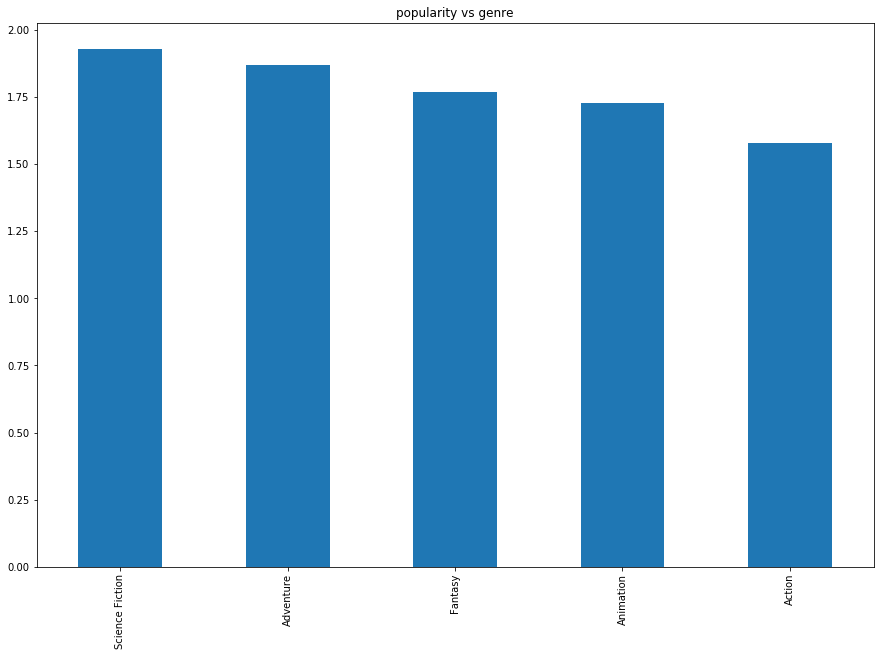

In [146]:
# popularity vs genre
print(mean_per_genre['popularity'].sort_values(ascending = False))
mean_per_genre['popularity'].sort_values(ascending = False).head(5).plot(kind = 'bar', figsize = [15, 10], title = 'popularity vs genre')

> Top 5 genres in 'popularity': Science Fiction, Adventure, Fatancy, Animation, Action which doesn't overlap with "top 5 popular genres" as I thought

Science Fiction    1000.54
Adventure           960.21
Fantasy             910.26
Animation           897.64
Action               814.9
Family              682.29
War                 563.39
Thriller            558.65
Western             548.31
Crime               526.86
Mystery              500.3
Drama               426.03
History             418.19
Comedy              407.68
Romance             353.21
Horror              329.76
Music               288.09
Documentary          66.81
TV Movie                35
Foreign              27.92
Name: vote_count, dtype: object


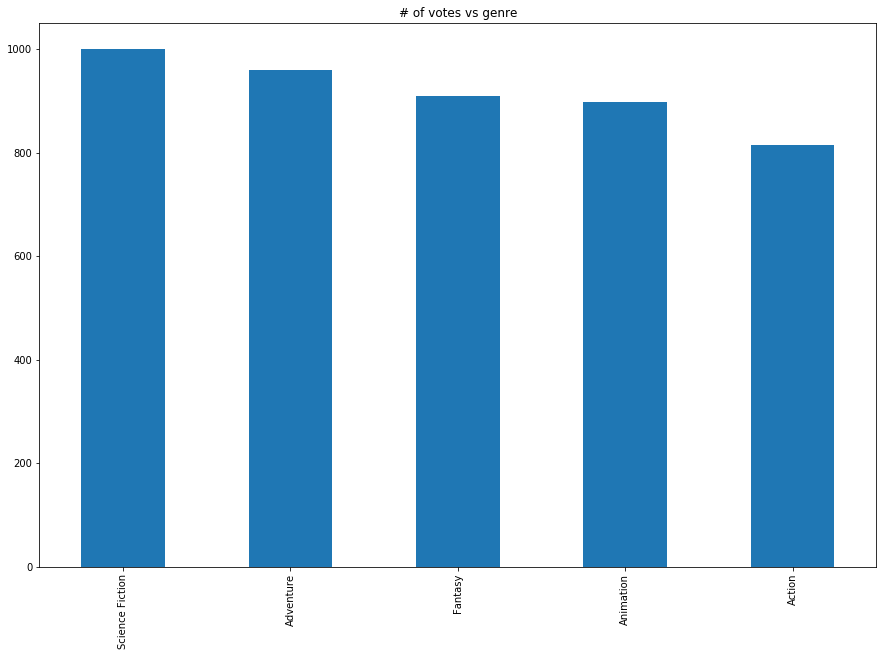

In [147]:
# vote_count vs genre
print(mean_per_genre['vote_count'].sort_values(ascending = False))
mean_per_genre['vote_count'].sort_values(ascending = False).head(5).plot(kind = 'bar', figsize = [15, 10], title = '# of votes vs genre')

> Top 5 genres in 'vote_count': Science Fiction, Adventure, Fantasy, Animation, Action which overlaps with "top 5 genres in 'popularity'"

Text(0.5,1,'popularity vs vote count')

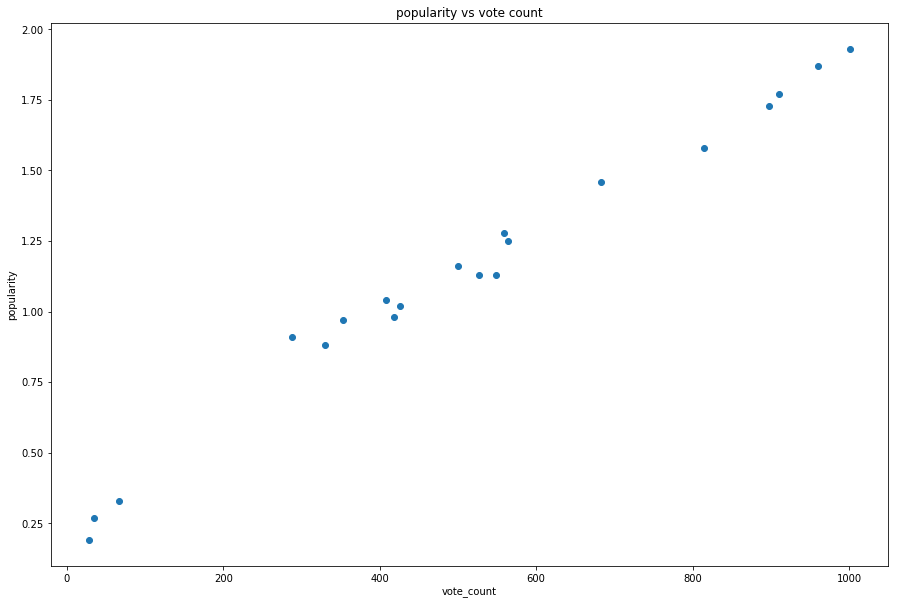

In [148]:
# popularity vs vote_count
plt.figure(figsize = [15, 10])
plt.scatter(mean_per_genre['vote_count'], mean_per_genre['popularity'])
plt.xlabel('vote_count')
plt.ylabel('popularity')
plt.title('popularity vs vote count')

> We can see that 'popularity' and 'vote_count' are strongly positive correlated. My assumption that popular genres gain movies more popularity/votes is proved wrong. 

Documentary        6.63
History             6.6
War                6.59
Western            6.47
Drama               6.4
Animation          6.37
Crime               6.3
Music              6.29
Mystery             6.2
Romance            6.19
Family             6.13
Adventure          6.12
Foreign            6.12
Thriller           6.07
Fantasy            6.06
Action             6.03
Science Fiction    6.02
Comedy             6.02
Horror             5.69
TV Movie            5.6
Name: vote_average, dtype: object


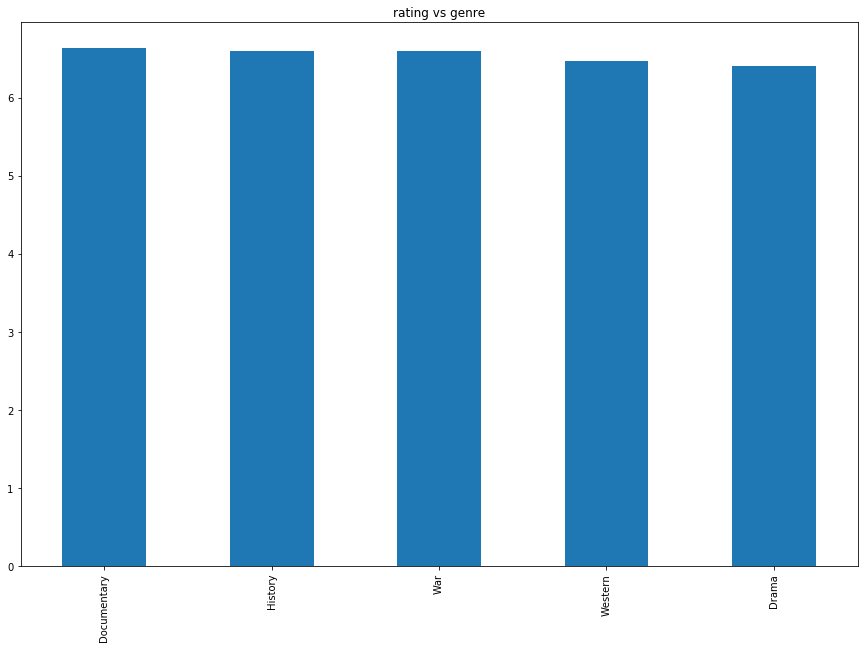

In [149]:
# vote_average vs genre
print(mean_per_genre['vote_average'].sort_values(ascending = False))
mean_per_genre['vote_average'].sort_values(ascending = False).head(5).plot(kind = 'bar', figsize = [15, 10], title = 'rating vs genre')


> Top 5 genres in 'vote_average' category: Documentation, Music, History, Animation, War.

Animation          2.59701e+08
Fantasy            2.22094e+08
Adventure          2.19758e+08
Family             2.03842e+08
Science Fiction    1.70145e+08
Action             1.58771e+08
War                1.06032e+08
Comedy              1.0096e+08
Thriller           1.00415e+08
Mystery            9.23634e+07
Romance            8.85239e+07
Western            8.74129e+07
Music              8.56571e+07
Crime              8.53869e+07
History            8.20308e+07
Drama              7.71101e+07
Horror              5.9762e+07
TV Movie               4.2e+07
Documentary        2.74052e+07
Foreign            1.19564e+07
Name: revenue, dtype: object


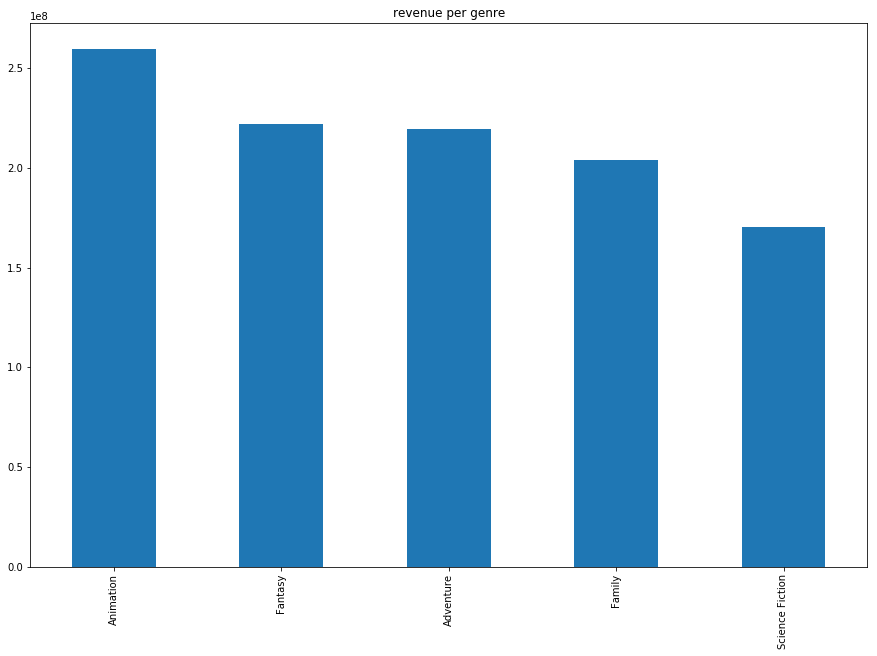

In [150]:
# revenue vs genre
print(mean_per_genre['revenue'].sort_values(ascending = False))
mean_per_genre['revenue'].sort_values(ascending = False).head(5).plot(kind = 'bar', figsize = [15, 10], title = "revenue per genre")


> Top 5 genres in 'revenue' category: Adventure, Fantasy, Animation, Action, Family - have a big overlap with 'popularity'/'vote_count' categories

Text(0.5,1,'revenue vs popularity')

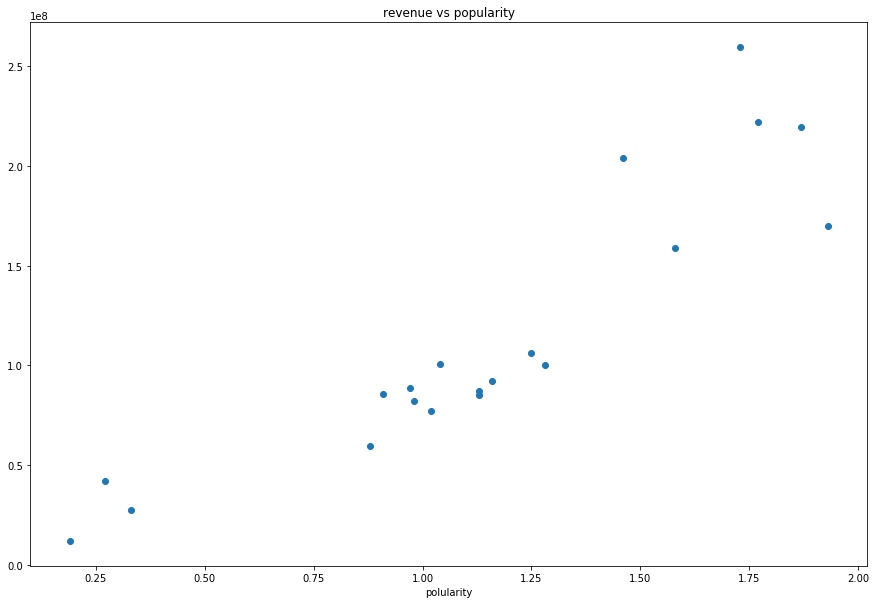

In [151]:
# revenue vs popularity
plt.figure(figsize = [15, 10])
plt.scatter(mean_per_genre['popularity'], mean_per_genre['revenue'])
plt.xlabel('polularity')
plt.title('revenue vs popularity')

> Revenue and popularity (and vote_count) has strong positive correlation.

#### Conclusion on the analysis of genre 
<li>
'popularity' and 'vote_count' has very strong positive correlation
</li>
<li>
'revenue' and 'popularity'/'vote_count' has strong positive correlation
</li>
<li>
4 out of top 5 genres in 'vote_average' category are not in either one of the other 4 categories - the rating has little to do with the popularity of the movie and the genre.
</li>
<li>
We can't predict the rating, the popularity and the revenue of a movie based on the popularity of its genre.

### What factors drive a movie's success (in revenue) ?

#### What genres more likely generate greater revenue ?


Text(0,0.5,'revenue in USD')

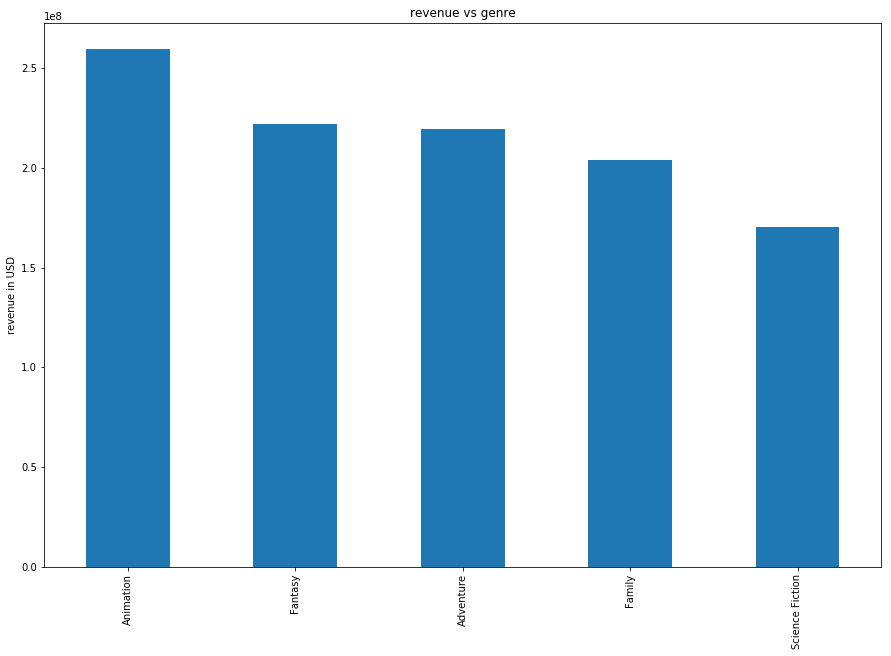

In [152]:
mean_per_genre['revenue'].sort_values(ascending = False).head(5).plot(kind = 'bar', figsize = [15, 10], title = 'revenue vs genre')
plt.ylabel('revenue in USD')

> Top 5 genres: Adventure, Fantasy, Animation, Action, Family

#### Greater budget leads to greater revenue ?

Text(0.5,1,'revenue vs budget')

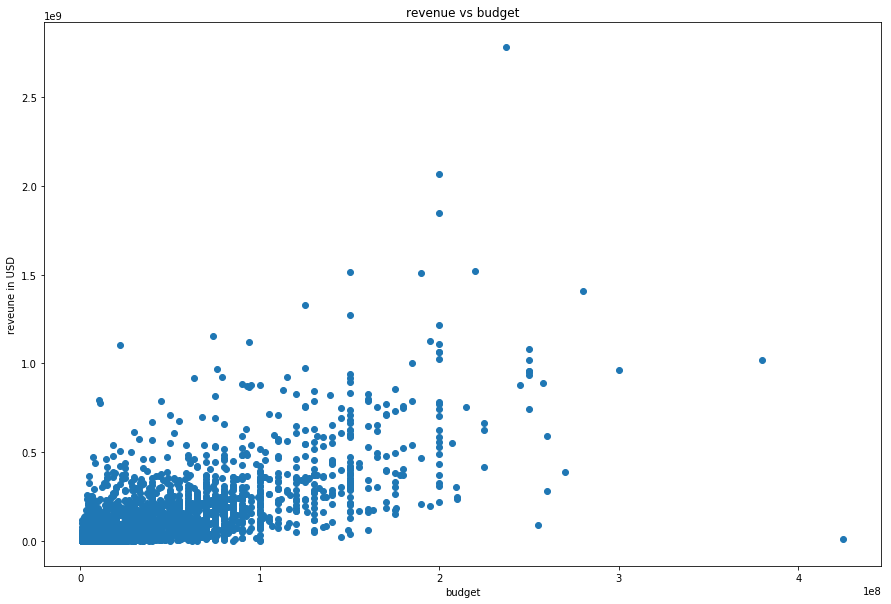

In [153]:
plt.figure(figsize = [15, 10])
plt.scatter(df_copy['budget'], df_copy['revenue'])
plt.xlabel('budget')
plt.ylabel('reveune in USD')
plt.title('revenue vs budget')

> 'Revenue' and 'Budget' does have positive correlation

#### Release month has anything to do with revenue?

Text(0,0.5,'revenue in USD')

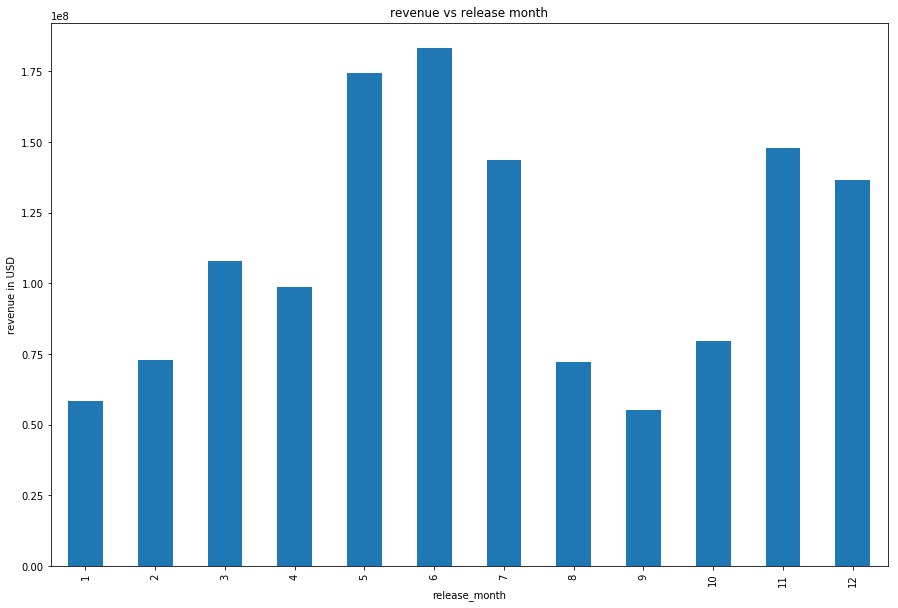

In [154]:
# Add a new column of 'release_month'
df_copy = df_copy.assign(release_month = df_copy['release_date'].apply(lambda x: x.month))
# Mean revenue per each month
df_copy.groupby('release_month', sort = True)['revenue'].mean().plot(kind = 'bar', figsize = [15, 10], title = 'revenue vs release month')
plt.ylabel('revenue in USD')


> Movies which are released in summer (May, June and July) and in holiday season (Nov and Dec) likely to generate more revenue , which does make sense 

#### Conclusion on the analysis of revenue
To generate greater revenue (not profit), we may
<ul>
<li>
Invest in the following genres: Adventure, Fantasy, Animation, Action, Family
</li>
<li>
Target the release date to summer and holiday season
</li>
<li>
Increase budget
</li>
</ul>

## Conclusion of the analysis of TMDb movie data
### Conclusion
<ul>
<li>
We can't predict the rating, the popularity and the revenue of a movie based on the popularity of its genre
</li>
<li>
To generate greater revenue (not profit), we may
<ul>
<li>
Invest in the following genres: Adventure, Fantasy, Animation, Action, Family
</li>
<li>
Target the release date to summer and holiday season
</li>
<li>
Increase budget
</li>
</ul>
</li>
</ul>

### Limitation
#### Missing and erroneous value in dataset
This dataset has lots of missing and erroneous data, which may distort our perception on distributions of some key variables, and hence may lead to biased conclusion.
<li>
Total of 5696 observations have ZERO budget
Total of 139 observations have less than 1 million budget, which is implausible (though possible)
</li>
<li>
Total of 6016 observations have ZERO revenue
</li>
<li>
Total of 23 observations have NULL genres
</li>

<b>In this analysis, the observations which have missing and/or erornous values are simply dropped. For more accurate analysis, we can visit Imdb and/or movies' home pages to double check on numbers, which is not an easy job.</b>

#### Limited analysis on "what factors drive a movie's success (in revenue)
As a consumer, I have preference over some 'cast'/'director' and 'production_companies'. More objectively and more likely, more established 'production_companies' have more budget to hire well-known 'cast' and 'director' to make movies in more popular genres which generate more revenues. <b>However, these variables are not analyzed. </b>  

In [155]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0